In [2]:
# Loading dataset 
import pandas as pd

# Replace the path with the actual location of your CSV file
file_path = 'E:\Customer Churn Classification Dashboard\synthetic_ecommerce_churn_data_70000.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first 5 rows to verify
print(df.head())


<>:5: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
C:\Users\User\AppData\Local\Temp\ipykernel_17036\3905132855.py:5: SyntaxWarning: invalid escape sequence '\C'
  file_path = 'E:\Customer Churn Classification Dashboard\synthetic_ecommerce_churn_data_70000.csv'


  Customer_ID  Transaction_History  Login_Activity  Purchase_Frequency  \
0  CUST_00001                    8              24                  10   
1  CUST_00002                   33              23                  24   
2  CUST_00003                   23              21                  10   
3  CUST_00004                   25              13                  31   
4  CUST_00005                    8              14                  39   

  Last_Purchase_Date  Churn_Status  
0     4/1/2023 12:02             0  
1    3/29/2024 12:02             0  
2    3/17/2023 12:02             0  
3    4/25/2024 12:02             0  
4    9/12/2024 12:02             0  


In [3]:
# Exploring data
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65533 entries, 0 to 65532
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          65533 non-null  object
 1   Transaction_History  65533 non-null  int64 
 2   Login_Activity       65533 non-null  int64 
 3   Purchase_Frequency   65533 non-null  int64 
 4   Last_Purchase_Date   65533 non-null  object
 5   Churn_Status         65533 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 3.0+ MB


In [4]:
df.describe()

,Transaction_History,Login_Activity,Purchase_Frequency,Churn_Status
count,65533.000000,65533.000000,65533.000000,65533.000000
mean,25.449468,15.506203,30.380572,0.320022
std,14.406051,8.678408,17.358979,0.466488
min,1.000000,1.000000,1.000000,0.000000
25%,13.000000,8.000000,15.000000,0.000000
50%,25.000000,15.000000,30.000000,0.000000
75%,38.000000,23.000000,45.000000,1.000000
max,50.000000,30.000000,60.000000,1.000000


In [5]:
#This will show you the number of rows and columns loaded, which might help you identify if some rows were dropped.
print(df.shape)

(65533, 6)


In [6]:
#The df.isnull() method in Pandas returns a DataFrame of the same shape as df, where each cell contains a Boolean value:

#True if the corresponding cell in df is null (missing data).
#False if the corresponding cell has a valid (non-null) value.
#This is useful for quickly checking which parts of your dataset are missing data.
df.isnull().sum()

Customer_ID            0
Transaction_History    0
Login_Activity         0
Purchase_Frequency     0
Last_Purchase_Date     0
Churn_Status           0
dtype: int64

In [7]:
# If my data was not clean or have missing values then I had to do following step to insert values where needed

# For numerical columns: Fill with median/mean.
 
 #df['Transaction_History'].fillna(df['Transaction_History'].median(), inplace=True)
 #df['Login_Activity'].fillna(df['Login_Activity'].median(), inplace=True)

#For date columns: Fill missing dates with the earliest/latest date or drop rows.

 #df['Last_Purchase_Date'] = pd.to_datetime(df['Last_Purchase_Date'])
 #df['Last_Purchase_Date'].fillna(df['Last_Purchase_Date'].min(), inplace=True)

In [8]:
# Feature Engineering 
#Create new features to improve model performance. Recency: Days since the last purchase.

from datetime import datetime
df['Last_Purchase_Date'] = pd.to_datetime(df['Last_Purchase_Date']) # Converting Last_Purchase_Date from string data type to datetime 
df['Recency'] = (datetime.now() - df['Last_Purchase_Date']).dt.days # .dt.days extracts the number of days from the time difference (a timedelta) that results from subtracting two datetime values.



In [9]:
print(df.head())

  Customer_ID  Transaction_History  Login_Activity  Purchase_Frequency  \
0  CUST_00001                    8              24                  10   
1  CUST_00002                   33              23                  24   
2  CUST_00003                   23              21                  10   
3  CUST_00004                   25              13                  31   
4  CUST_00005                    8              14                  39   

   Last_Purchase_Date  Churn_Status  Recency  
0 2023-04-01 12:02:00             0      684  
1 2024-03-29 12:02:00             0      321  
2 2023-03-17 12:02:00             0      699  
3 2024-04-25 12:02:00             0      294  
4 2024-09-12 12:02:00             0      154  


In [10]:
# Drop irrelevant columns
df.drop(['Customer_ID', 'Last_Purchase_Date'], axis=1, inplace=True) 
# axis=1: This tells Pandas to drop columns. (If it were axis=0, it would drop rows.)
# inplace=True: This modifies the existing DataFrame directly instead of returning a new DataFrame with the columns removed.
print(df.columns)


Index(['Transaction_History', 'Login_Activity', 'Purchase_Frequency',
       'Churn_Status', 'Recency'],
      dtype='object')


In [11]:
# Train Test Split

from sklearn.model_selection import train_test_split

X = df.drop('Churn_Status', axis=1)
y = df['Churn_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#test_size=0.2:This means 20% of the data is reserved for testing, and 80% for training. The value is typically a float between 0.0 and 1.0.

#random_state=42: This sets the seed for random number generation, ensuring the split is reproducible. You can use any integer for reproducibility.


In [12]:
# Now that I have split the data, I will proceed with building, training, and evaluating the model using Random Forest and XGBoost.
!pip install xgboost --user



In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
#`n_estimators=100` specifies the number of decision trees in the random forest.
#Having more trees usually improves the model's performance and stability by reducing variance, but it also increases computation time.
#It's an important parameter to balance between performance and training efficiency.

In [14]:
# Training the Model
# Fit the model on the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
# Predict on the test data
rf_predictions = rf_model.predict(X_test)


In [16]:
# Model Evaluation
# Accuracy
accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {accuracy:.2f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

# Classification Report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Accuracy: 0.69
Confusion Matrix:
[[7584 1356]
 [2734 1433]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      8940
           1       0.51      0.34      0.41      4167

    accuracy                           0.69     13107
   macro avg       0.62      0.60      0.60     13107
weighted avg       0.66      0.69      0.67     13107



In [17]:
# Import and Training XGBoost model
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

#- **Evaluation Metric:** It tells the model to measure its performance using **log loss**.
#- **What Log Loss Does:** Log loss checks how close the predicted probabilities are to the actual class labels.
#- **Lower is Better:** A lower log loss means your model's predictions are more accurate.
# Train the model
xgb_model.fit(X_train, y_train)


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [15:31:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [18]:
# In this step I am Predicting target variable using the XGBoost model I traind earlier 
xgb_predictions = xgb_model.predict(X_test)



In [19]:
# Accuracy
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")

# Confusion Matrix & Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_predictions))

print("Classification Report:")
print(classification_report(y_test, xgb_predictions))

XGBoost Accuracy: 0.70
Confusion Matrix:
[[7935 1005]
 [2922 1245]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      8940
           1       0.55      0.30      0.39      4167

    accuracy                           0.70     13107
   macro avg       0.64      0.59      0.59     13107
weighted avg       0.67      0.70      0.67     13107



In [20]:
#SHAP Visualizations for Model Interpretability
#SHAP (SHapley Additive exPlanations) helps explain how much each feature contributes to a model’s predictions.
#It’s great for understanding why a customer is classified as churned or not churned in your Random Forest and XGBoost models.
!pip install shap


Defaulting to user installation because normal site-packages is not writeable


<Figure size 1200x800 with 0 Axes>

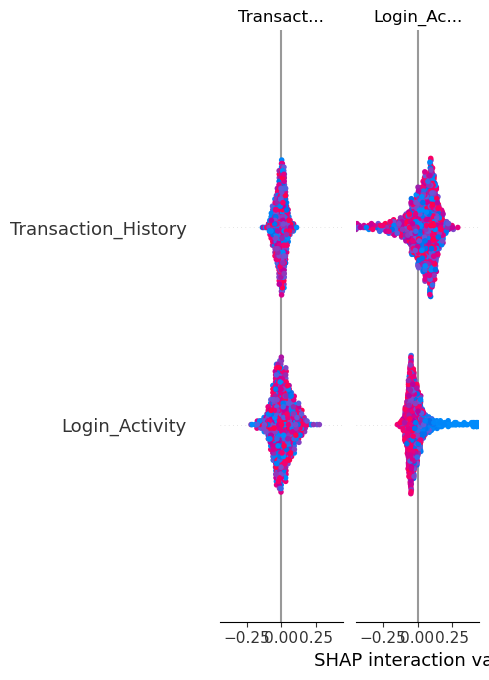

In [21]:
import shap
import matplotlib.pyplot as plt
#Following is Summary Plot for both models (Feature Importance Analysis)
             #Shows overall feature importance across many predictions.
             #Useful for understanding which features have the most impact on the model globally.
# Create SHAP explainer for Random Forest
# SHAP visualization for random forest with 100 trees took huge computing power,so I used smaller data for this.the other option was to reduce number of trees in my random forest model.
X_test_sample = X_test.sample(1000, random_state=42)  # Take a subset
rf_explainer = shap.TreeExplainer(rf_model)
rf_shap_values = rf_explainer.shap_values(X_test_sample)
plt.figure(figsize=(12, 8))
shap.summary_plot(rf_shap_values, X_test_sample)








 98%|===================| 12809/13107 [00:37<00:00]        

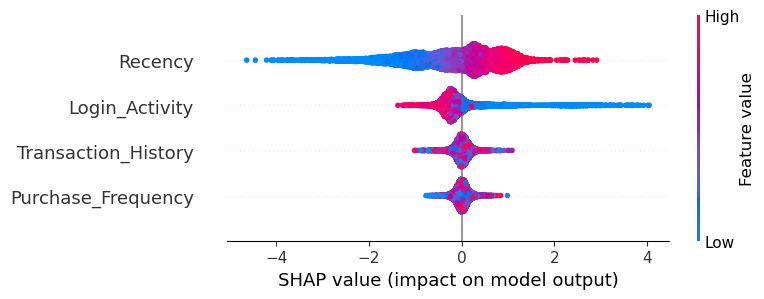

In [22]:
#Summary Plot (Feature Importance Analysis)
#This will show which features influence churn prediction the most.
# Create SHAP explainer for XGBoost
xgb_explainer = shap.Explainer(xgb_model, X_train)
xgb_shap_values = xgb_explainer(X_test)

shap.summary_plot(xgb_shap_values, X_test)





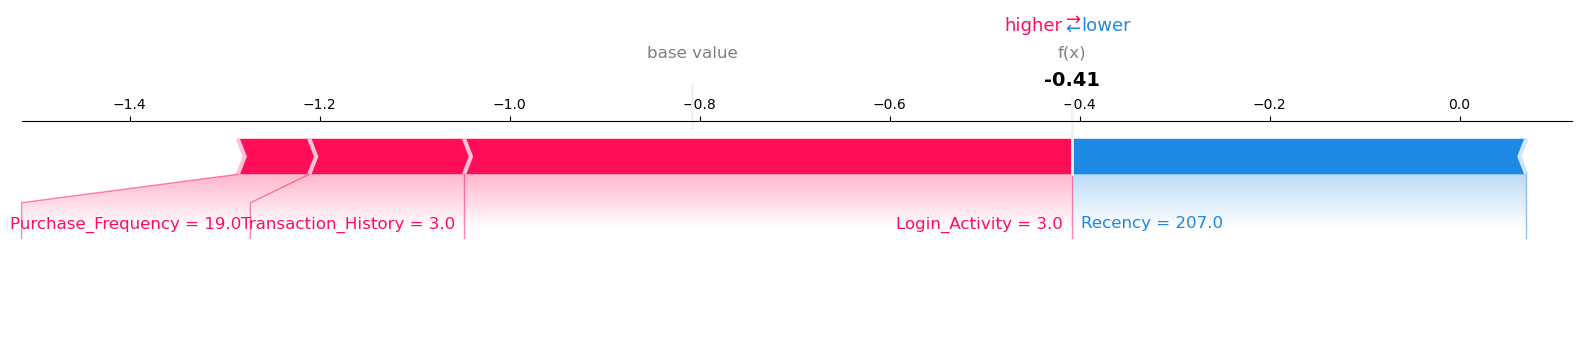

In [28]:

#Force Plot (Individual Prediction Explanation)
        #Explains a single prediction by showing how each feature pushes the prediction higher or lower.
        #Useful for understanding the reasons behind one specific prediction.
        #Red indicates features pushing the prediction higher (making the output more likely towards the positive side).
        #Blue indicates features pushing the prediction lower (making the output less likely or moving it towards the negative side).
record_index = 9  # for the 10th record (0-indexed)
expl = shap.Explanation(
    values=xgb_shap_values[record_index],
    base_values=xgb_explainer.expected_value,
    data=X_test.iloc[record_index, :]
)
shap.force_plot(
    expl.base_values,
    expl.values,
    expl.data,
    feature_names=X_test.columns,
    matplotlib=True
)









In [32]:

import numpy as np

def predict_customer_churn(model):
    print("\n--- Customer Churn Prediction ---")
    
    # Collect user inputs
    Purchase_Frequecny = int(input("Enter the Purchase Frequency of your customer: "))
    
    Transaction_History = float(input("Enter the Number of Purchases of your customer: "))
    Login_Activity = int(input("Enter the number of times customer used the platform: "))
    Recency = int(input("Enter the number of days passed since the last purchase: "))
    

    
    
    # Create an input array for the model
    input_data = np.array([[Purchase_Frequecny,Transaction_History,Login_Activity,Recency]])
    
    # Make a prediction
    prediction = model.predict(input_data)[0]
    
    # Display the result
    print("\nPrediction: ", " (Customer will Churn)" if prediction == 1 else " (Customer will Stay)")

predict_customer_churn(xgb_model)  # Using XGBoost Model
predict_customer_churn(rf_model)  # Use Random Forest Model



--- Customer Churn Prediction ---


Enter the Purchase Frequency of your customer:  38
Enter the Number of Purchases of your customer:  32
Enter the number of times customer used the platform:  43
Enter the number of days passed since the last purchase:  22



Prediction:   (Customer will Stay)

--- Customer Churn Prediction ---


Enter the Purchase Frequency of your customer:  38
Enter the Number of Purchases of your customer:  32
Enter the number of times customer used the platform:  43
Enter the number of days passed since the last purchase:  22



Prediction:   (Customer will Stay)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
